# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import datetime
import json
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
count = 0
city_names = []
clouds = []
countries = []
dates = []
humidities = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []
for city in cities:
    try:
        query = f"{base_url}appid={api_key}&units={units}&q="
        response = requests.get(query + city).json()
        count = count + 1
        print(f"Processing Record {count} |  {city}")
        country = response["sys"]["country"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        date = response["dt"]
        temp = 1.8*(response["main"]["temp_max"]) + 32
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = 2.236936*(response["wind"]["speed"])
        city_names.append(city)
        latitudes.append(latitude)
        longitudes.append(longitude)
        countries.append(country)
        dates.append(date)
        max_temps.append(temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        
        
    except KeyError:
        print("Couldn't locate data. Skipping city!")
           
weather_data = {"City": city_names,
                "Cloudiness": clouds,
                "Country": countries,
                "Date": dates,
                "Humidity": humidities,
                "Lat": latitudes,
                "Lng": longitudes,
                "Max Temp": max_temps,
                "Wind Speeds": wind_speeds}
weather_reports = pd.DataFrame(weather_data)
weather_reports[["Max Temp", "Wind Speeds"]] = weather_reports[["Max Temp", "Wind Speeds"]].apply(pd.to_numeric)
weather_reports["Max Temp"] = weather_reports["Max Temp"].map("{:.2f}".format)
weather_reports["Wind Speeds"] = weather_reports["Wind Speeds"].map("{:.2f}".format)    

Processing Record 1 |  denpasar
Processing Record 2 |  mataura
Processing Record 3 |  port alfred
Processing Record 4 |  barentsburg
Couldn't locate data. Skipping city!
Processing Record 5 |  hobart
Processing Record 6 |  grindavik
Processing Record 7 |  barrow
Processing Record 8 |  huarmey
Processing Record 9 |  north myrtle beach
Processing Record 10 |  bredasdorp
Processing Record 11 |  karpathos
Processing Record 12 |  karkaralinsk
Couldn't locate data. Skipping city!
Processing Record 13 |  jamestown
Processing Record 14 |  husavik
Processing Record 15 |  pisco
Processing Record 16 |  beisfjord
Processing Record 17 |  tuktoyaktuk
Processing Record 18 |  kununurra
Processing Record 19 |  faya
Processing Record 20 |  timizart
Processing Record 21 |  rikitea
Processing Record 22 |  kyzyl-suu
Processing Record 23 |  iqaluit
Processing Record 24 |  guadalupe
Processing Record 25 |  arraial do cabo
Processing Record 26 |  illoqqortoormiut
Couldn't locate data. Skipping city!
Processin

Processing Record 222 |  yanaul
Processing Record 223 |  garoua boulai
Processing Record 224 |  samarai
Processing Record 225 |  faanui
Processing Record 226 |  dongsheng
Processing Record 227 |  manggar
Processing Record 228 |  gornopravdinsk
Processing Record 229 |  buraydah
Processing Record 230 |  magadan
Processing Record 231 |  roros
Processing Record 232 |  akyab
Processing Record 233 |  iki-burul
Processing Record 234 |  samalaeulu
Couldn't locate data. Skipping city!
Processing Record 235 |  ewa beach
Processing Record 236 |  bodden town
Processing Record 237 |  muroto
Processing Record 238 |  port elizabeth
Processing Record 239 |  ribeira grande
Processing Record 240 |  narsaq
Processing Record 241 |  mantua
Processing Record 242 |  gat
Processing Record 243 |  vega de alatorre
Processing Record 244 |  sonoita
Processing Record 245 |  mercedes
Processing Record 246 |  mahebourg
Processing Record 247 |  atambua
Processing Record 248 |  flinders
Processing Record 249 |  atar
P

Processing Record 451 |  amapa
Processing Record 452 |  emure
Processing Record 453 |  wuwei
Processing Record 454 |  oranjestad
Processing Record 455 |  lata
Processing Record 456 |  nemuro
Processing Record 457 |  glens falls
Processing Record 458 |  quelimane
Processing Record 459 |  hihifo
Couldn't locate data. Skipping city!
Processing Record 460 |  port-gentil
Processing Record 461 |  san jeronimo
Processing Record 462 |  vardo
Processing Record 463 |  knysna
Processing Record 464 |  alexandria
Processing Record 465 |  mnogovershinnyy
Processing Record 466 |  arlit
Processing Record 467 |  kathmandu
Processing Record 468 |  richards bay
Processing Record 469 |  yabrud
Processing Record 470 |  samusu
Couldn't locate data. Skipping city!
Processing Record 471 |  isangel
Processing Record 472 |  mtambile
Processing Record 473 |  la ronge
Processing Record 474 |  hailar
Processing Record 475 |  grand river south east
Couldn't locate data. Skipping city!
Processing Record 476 |  boa v

In [50]:
weather_reports.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
0,denpasar,40,ID,1592265734,83,-8.65,115.22,78.80,5.82
1,mataura,66,NZ,1592265896,71,-46.19,168.86,53.71,4.14
2,port alfred,95,ZA,1592265896,96,-33.59,26.89,57.00,4.81
3,hobart,20,AU,1592265615,47,-42.88,147.33,59.00,27.51
4,grindavik,40,IS,1592265896,75,63.84,-22.43,46.40,10.29


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
weather_reports.to_csv("weather_reports.csv")
weather_reports.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
0,denpasar,40,ID,1592265734,83,-8.65,115.22,78.80,5.82
1,mataura,66,NZ,1592265896,71,-46.19,168.86,53.71,4.14
2,port alfred,95,ZA,1592265896,96,-33.59,26.89,57.00,4.81
3,hobart,20,AU,1592265615,47,-42.88,147.33,59.00,27.51
4,grindavik,40,IS,1592265896,75,63.84,-22.43,46.40,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

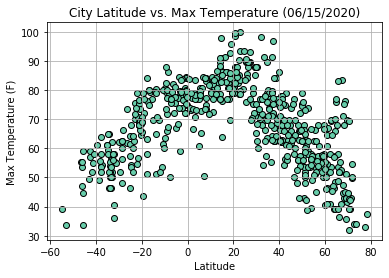

The above scatter plot shows the relationship between the latitude of cities and their maximum temperatures, as recorded on June 14, 2020.


In [52]:
converted_dates = []
for date in dates:
    converted_date = datetime.datetime.fromtimestamp(date).strftime("%m/%d/%Y")
    converted_dates.append(converted_date)
    
weather_reports["Converted Date"] = converted_dates
weather_reports = weather_reports[["City", 
                                   "Cloudiness", 
                                   "Country", 
                                   "Date", 
                                   "Converted Date", 
                                   "Humidity", 
                                   "Lat", 
                                   "Lng", 
                                   "Max Temp", 
                                   "Wind Speeds"]]
plot_date = weather_reports.loc[0, "Converted Date"]
plt.scatter(weather_reports["Lat"], weather_data["Max Temp"], facecolor="#66CDAA", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('Lat_vs_Temp.png', dpi=300)
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their maximum temperatures, as recorded on June 14, 2020.")


#### Latitude vs. Humidity Plot

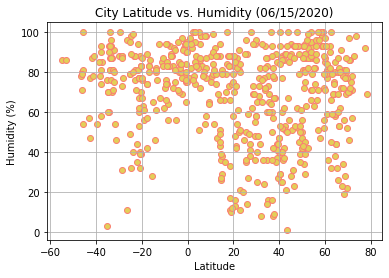

The above scatter plot shows the relationship between the latitude of cities and their humidity, as recorded on June 14, 2020.


In [53]:
plt.scatter(weather_reports["Lat"], weather_data["Humidity"], facecolor="#E3CF57", edgecolor="salmon")
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('Latitude vs. Humidity Plot.png', dpi=300)
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their humidity, as recorded on June 14, 2020.")


#### Latitude vs. Cloudiness Plot

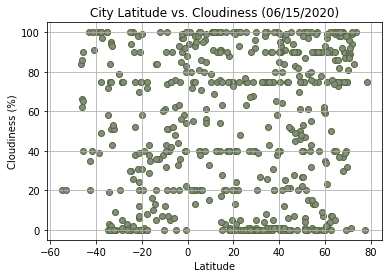

The above scatter plot shows the relationship between the latitude of cities and their cloudiness, as recorded on June 14, 2020.


In [54]:
plt.scatter(weather_reports["Lat"], weather_data["Cloudiness"], facecolor="#838B8B", edgecolor="darkolivegreen")
plt.title(f"City Latitude vs. Cloudiness ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('Latitude vs. Cloudiness Plot.png', dpi=300)
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their cloudiness, as recorded on June 14, 2020.")


#### Latitude vs. Wind Speed Plot

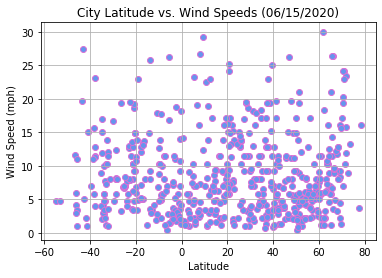

The above scatter plot shows the relationship between the latitude of cities and wind speeds, as recorded on June 14, 2020.


In [55]:
plt.scatter(weather_reports["Lat"], weather_data["Wind Speeds"], facecolor="#6495ED", edgecolor="orchid")
plt.title(f"City Latitude vs. Wind Speeds ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('Latitude vs. Wind Speed Plot.png', dpi=300)
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and wind speeds, as recorded on June 14, 2020.")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [56]:
# Create Northern and Southern Hemisphere DataFrames
#weather_reports.head()

# Northern DF
northern_df = weather_reports.loc[weather_reports["Lat"] > 0,:]


# Southern DF
southern_df = weather_reports.loc[weather_reports["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

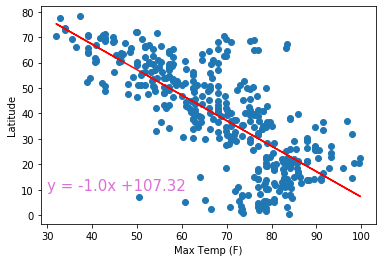

In [57]:
# Set X and Y vals
x_values = northern_df["Max Temp"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(30,10),fontsize=15,color="orchid")

# Make Labels
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png', dpi=300)
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

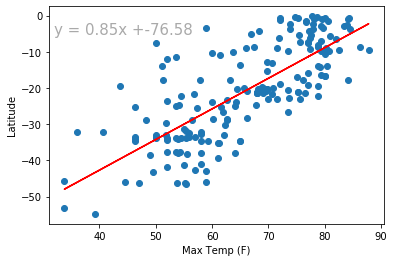

In [58]:
# Set X and Y vals
x_values = southern_df["Max Temp"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(32,-5),fontsize=15,color="darkgrey")

# Make Labels
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png', dpi=300)
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

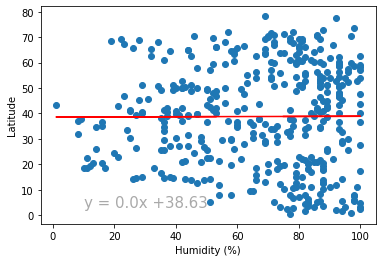

In [59]:
# Set X and Y vals
x_values = northern_df["Humidity"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(10,3),fontsize=15,color="darkgrey")

# Make Labels
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png', dpi=300)
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

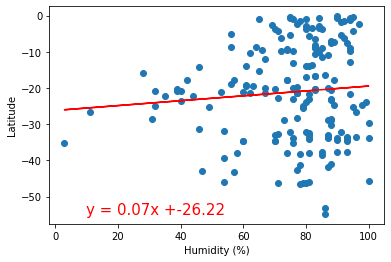

In [60]:
# Set X and Y vals
x_values = southern_df["Humidity"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(10,-55),fontsize=15,color="red")

# Make Labels
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png', dpi=300)
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

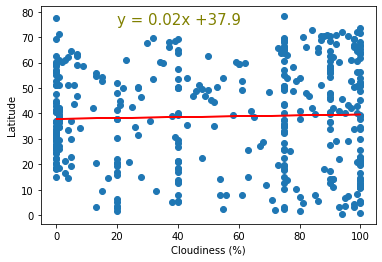

In [61]:
# Set X and Y vals
x_values = northern_df["Cloudiness"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(20,75),fontsize=15,color="olive")

# Make Labels
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png', dpi=300)
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

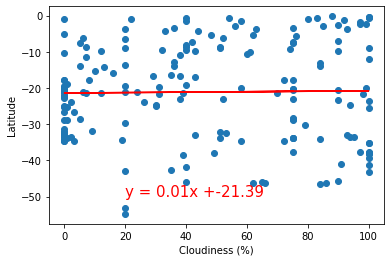

In [62]:
# Set X and Y vals
x_values = southern_df["Cloudiness"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")

# Make Labels
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png', dpi=300)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

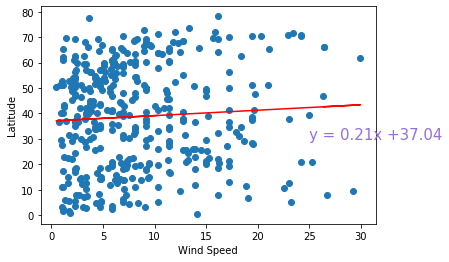

In [63]:
# Set X and Y vals
x_values = northern_df["Wind Speeds"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(25,30),fontsize=15,color="mediumpurple")

# Make Labels
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png', dpi=300)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

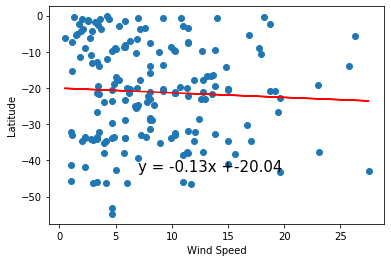

In [66]:
# Set X and Y vals
x_values = southern_df["Wind Speeds"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(7,-43),fontsize=15,color="black")

# Make Labels
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png', dpi=300)
plt.show()